In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

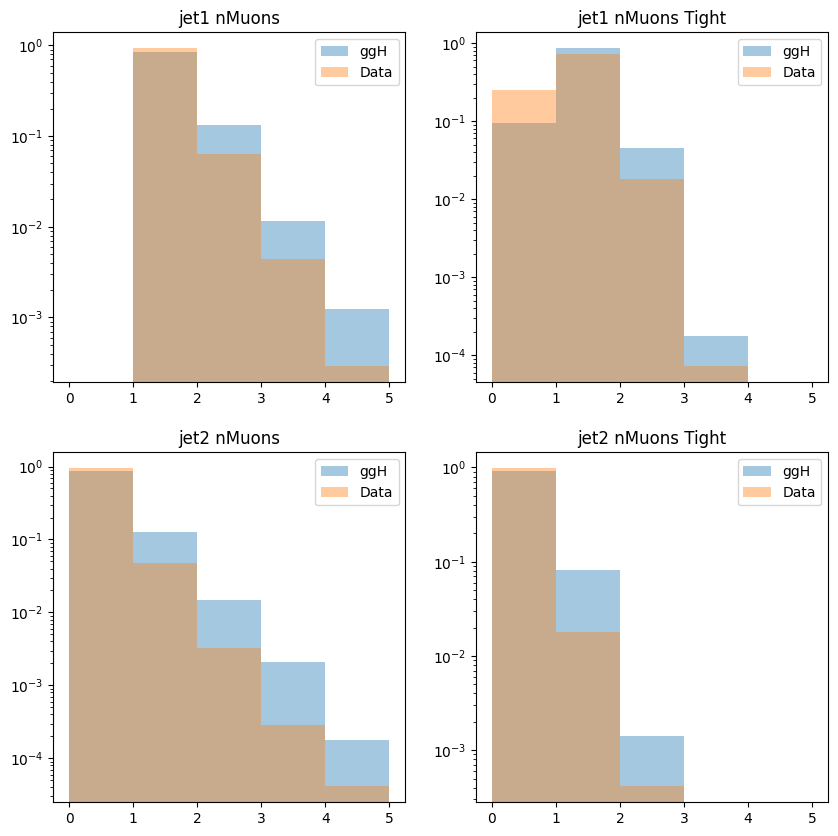

In [3]:
filePath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB/others/GluGluHToBB_199.parquet"
df = pd.read_parquet(filePath)

filePath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A/BParkingDataRun20181A_1017.parquet"
dfd = pd.read_parquet(filePath)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bins = np.arange(0, 6)
ax[0,0].hist(df.jet1_nMuons, bins=bins, weights=np.ones(len(df))/len(df) ,label='ggH', alpha=0.4)
ax[0,0].hist(dfd.jet1_nMuons, bins=bins, weights=np.ones(len(dfd))/len(dfd) ,label='Data', alpha=0.4)
ax[0,0].set_title("jet1 nMuons")
ax[0,0].legend()
ax[0,0].set_yscale('log')


ax[0,1].hist(np.clip(df.jet1_nTightMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(df))/len(df), label='ggH', alpha=0.4)
ax[0,1].hist(np.clip(dfd.jet1_nTightMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(dfd))/len(dfd), label='Data', alpha=0.4)
ax[0,1].set_title("jet1 nMuons Tight")
ax[0,1].set_yscale('log')
ax[0,1].legend()

ax[1,0].hist(np.clip(df.jet2_nMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(df))/len(df) ,label='ggH', alpha=0.4)
ax[1,0].hist(np.clip(dfd.jet2_nMuons, bins[0], bins[-1]), bins=bins, weights=np.ones(len(dfd))/len(dfd) ,label='Data', alpha=0.4)
ax[1,0].set_title("jet2 nMuons")
ax[1,0].legend()
ax[1,0].set_yscale('log')


ax[1,1].hist(df.jet2_nTightMuons, bins=bins, weights=np.ones(len(df))/len(df), label='ggH', alpha=0.4)
ax[1,1].hist(dfd.jet2_nTightMuons, bins=bins, weights=np.ones(len(dfd))/len(dfd), label='Data', alpha=0.4)
ax[1,1].set_title("jet2 nMuons Tight")
ax[1,1].set_yscale('log')
ax[1,1].legend()


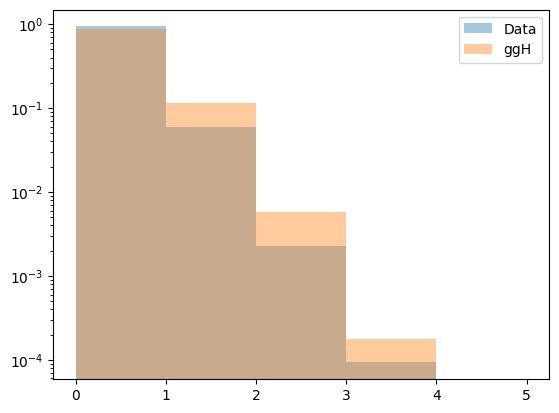

In [9]:
fig, ax =plt.subplots(1, 1)
bins=np.arange(6)
ax.hist(dfd.jet1_nElectrons, bins=bins, weights=np.ones(len(dfd))/len(dfd), alpha=0.4, label='Data')
ax.hist(df.jet1_nElectrons, bins=bins, weights=np.ones(len(df))/len(df), alpha=0.4, label='ggH')
ax.legend()

ax.set_yscale('log')
